In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

Δημιουργεία Class για το Νευρωνικό Δίκτυο είναι Αντικειμενοστρεφής προγραμματισμός.\
Αρχιτεκτονική Δικτύου:\
α) input 4 features\
β) 2 hidden layers fully conected\
γ) output 3 classes

Για βασικά των κλασεων δες https://youtu.be/apACNr7DC_s?t=270 \
Το def δηλώνει την δήλωση μιας μεθόδου \
Το __init__ είναι η μέθοδος constractor μας δηλαδή η μέθοδος που κάθε φορά που δημιουργούμε ένα αντικείμενο αυτής της κλάσης μας αρχικοποιεί και δημιουργεί αυτό το αντικείμενο. \
Είναι καλό να βάζω ένα dockstring σε κάθε κλάση και μέθοδο έτσι ώστε να περιγράφω συνοπτικά τι κάνουν.\
Το self συνδέει τις μεταβλητές μέσα στις μεθόδους της κλάσης με το αντικείμενο που δημιουργεί, αλλιώς εαν δεν έχουν self.blabla() και είναι blabla() σκέτο τότε έχουνε εμβέλεια μόνο μέσα στην κλάση. Άρα και για τις μεθόδους μέσα στην class έαν θέλουμε να αφορούν το παιδί θα πρέπει σαν πρώτη παράμετρο να έχουν το self.\
Άρα συνοψίζοντας το self αναφέρεται στο object (=instance στην python) και όποτε θέλω να ανφέρομαι στο object θα βάζω self.

Η κλάση network είναι υποκλάση της κλάσης nn.Module , στην παρένθεση δίπλα από το όνομα της κλάσης μας δηλώνουμε την κλάση Μαμα.\
δες https://www.w3schools.com/python/python_inheritance.asp και https://www.w3schools.com/python/python_classes.asp \
Επομένως πέρνει τα στοιχεία και τις μεθόδους της nn.Module \
ΑΛΛΑ επειδή φτιάχνουμε μέθοδο initialization (__init__) μέσα στην κλάση μας Network κάνουμε override την __init__ της Μαμάς που χρειάζεται για να δουλέυουνε όλες αυτές οι συναρτήσεις neural network που έχουμε μέσα nn.Linear κτλ... και όχι μόνο αυτό δεν αρχικοποιούνται και άλλα πράγματα σωστά για το νευρωνικό δίκτυο. \
Για αυτόν τον λόγο μέσα στην δικιά μας __init__ το πρώτο πράγμα που θα κάνουμε για να δουλέυουν οι συναρτήσεις και τα λοιπά είναι να καλέσουμε την __init__ της Μαμάς κλάσης, αυτό το κάνουμε καλόντας super().__init__() \
Θα μπορούσε αντί αυτόυ να γράφω συγκεκριμένα την Μαμά κλάση έτσι nn.Module.__init__(self) που είναι το ίδιο πράγμα.


In [2]:
class Network(nn.Module):
    """A neural network classifying Irises"""
    def __init__(self,in_features=4,hidden1=8,hidden2=9,out_features=3) :   #def= δημιουργεία function , __init__ αρχικοποιεί ένα νέο αντικείμενο της κλάσηςμ σ.υμφωνα με τις μεταβλητές του
        super().__init__() # nn.Module.__init__(self)
        self.fc1 = nn.Linear(in_features,hidden1)
        self.fc2 = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2,out_features)
    
    def forward(self,x):
        """Συνάρτηση για forward propagation με ReLU"""
        x=F.relu(self.fc1(x)) #εφαρμογή ReLU στο πρώτο hidden layer (fully concected)
        x=F.relu(self.fc2(x)) #εφαρμογή ReLU στο πρώτο hidden layer (fully concected)
        x=self.out(x) #ταυτόχρονα σπρώχνει το input από το input layer μέχρι το output layer , το output layer δεν έχει ReLU

        return x
    



Το παρακάτω είναι για να συμβαδίζει το NN με το Tutorial να έχουνε το ιδιο seed , αρχική τυχαία περιοχή για να μην αποκλίνουνε πολύ το δικό μου NN με αυτό του Tutorial. (δεν μπένει σε κανονικές εφαρμογές άρα) , (δεν είμαι πολύ σίγουρος για την λειτουργεία του seed )

In [3]:
torch.manual_seed(41)

Δημιουργεία του NeuralNetwork ,  φτιάχνουμε δηλαδή ένα παιδί της κλάσης Network

In [4]:
network = Network()

Load βιβλιοθήκες για την φόρτωση των Data και την παρουσιαση τους σε γραφήματα

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Load το Dataset από GitHub link

In [6]:
link = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
Dataframe=pd.read_csv(link)

Πρώτα 5 στοιχεία

In [7]:
Dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Τελευταία 5 στοιχεία

In [8]:
Dataframe.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


Αλλαγή των species σε αριθμούς

In [9]:
Dataframe['species'] = Dataframe['species'].replace('setosa',0)
Dataframe['species'] = Dataframe['species'].replace('versicolor',1)
Dataframe['species'] = Dataframe['species'].replace('virginica',2)

Dataframe

C:\Users\jkazi\AppData\Local\Temp\ipykernel_3752\3470656377.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Dataframe['species'] = Dataframe['species'].replace('virginica',2)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Χωρισμός X = input features και y = labels \
για την drop δες https://www.w3schools.com/python/pandas/ref_df_drop.asp

In [10]:
X = Dataframe.drop('species',axis='columns')
print(X.head(),X.dtypes)
y = Dataframe['species']
print(y.head(),y.dtypes)

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object
0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64 int64


Μετατροπή X και y σε αριθμούς μόνο, από Dataframe σε Numpy array.

In [11]:
X = X.values #προσοχή αυτό είναι συνάρτηση του pandas
y = y.values
print(X.dtype,y.dtype)

float64 int64


Διαχωρισμός train και test datasets

In [12]:
from sklearn.model_selection import train_test_split

Άρα φτιάχνω τα μητρώα X_train, X_test,y_train,y_test για να πάρουν τις νέες διαμερίσεις του dataset και ορίζω το train test split ως 80% / 20% . \
δες εδώ https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html \
την έτιμη συνάρτηση που διαχωρίζει τα δεδομένα σε train και test σύνολα με τυχαίο τρόπο για να αλλάζει κάθε φορά το split.

In [13]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)
#το random seed = 41 το διαλέγω για να ταιριάζει με αυτό του tutorial αλλιως δεν χρειάζεται..

Μετατροπή των X features σε float tensors

In [14]:
X_train = torch.FloatTensor(X_train)
X_test= torch.FloatTensor(X_test)
print(X_train.dtype,X_test.dtype)

torch.float32 torch.float32


In [15]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
print(y_train.dtype,y_test.dtype)

torch.int64 torch.int64


Ορισμός Loss function και Optimizer \
Στον optimizer βάζουμε την αρχιτεκτονική του δικτύου και το learning rate που θέλουμε.

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(network.parameters(),lr=0.01) 

In [17]:
network.parameters

<bound method Module.parameters of Network(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

Train το Δίκτυο

Όταν καλώ το δίκτυο μου για να κάνω forward propagation χρησιμοποιώ network(X_train) και ποτέ network.forward(X_train) διότι δεν υποστηρίζει πολλές λειτουργίες, δεν έχει hooks , δεν συμπεριφέρετε όπως έχω ορίσει εγω  την forward μεθοδο μέσα στην κλάση μου και άλλα πολλά κακά, δες txt του ChatGPT.

In [18]:
epoch = 100 #100 εποχές
losses =[] #λίστα που θα βλέπω την μεταβολή του cross entropy loss ανα κάθε εποχή

for i in range(epoch):
    y_pred = network(X_train) #πάρε πρόβλεψη από το δίκτυο
    loss = criterion(y_pred,y_train) # προβλεψη vs αληθινό
    #βάλε το loss στην λίστα με τα losses
    losses.append(loss.detach().numpy()) # δες https://www.w3schools.com/python/ref_list_append.asp

    #κάθε δέκα εποχές να βγάζει και το loss ξανά
    if i % 10 == 0:
        print(f'Εποχή: {i} με CrossEntropyLoss {loss}')

    #back propagation
    optimizer.zero_grad() #δες https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html
    #κάνει reset τις παραγώγους από το προηγούμενο back propagation για να είναι ανεξάρτητα κάθες φορά τα back propagations
    loss.backward() #το back propagation υπολογίζει τις μερικές παραγώγους
    optimizer.step() #αναναιώνει τα βάρυ των νευρώνων σύμφωνα με τις μερικές παραγώγους σύμφωνα με τον αλγόριθμο αναναίωσης που διαλέξαμε εδώ Adam


Εποχή: 0 με CrossEntropyLoss 1.1251550912857056
Εποχή: 10 με CrossEntropyLoss 1.0096259117126465
Εποχή: 20 με CrossEntropyLoss 0.8157405853271484
Εποχή: 30 με CrossEntropyLoss 0.585706353187561
Εποχή: 40 με CrossEntropyLoss 0.3999636471271515
Εποχή: 50 με CrossEntropyLoss 0.26768800616264343
Εποχή: 60 με CrossEntropyLoss 0.17942361533641815
Εποχή: 70 με CrossEntropyLoss 0.12151690572500229
Εποχή: 80 με CrossEntropyLoss 0.0860118716955185
Εποχή: 90 με CrossEntropyLoss 0.06520851701498032


Γραφική Loss

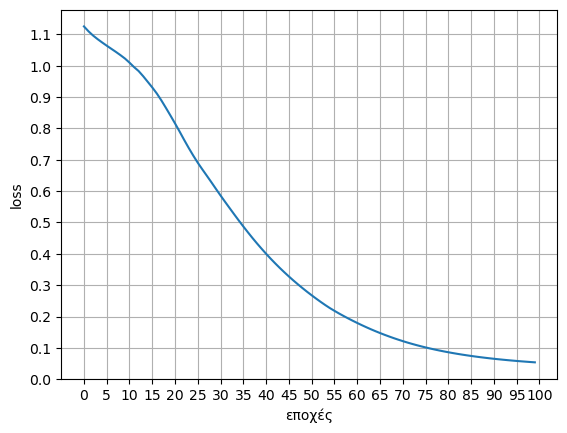

In [19]:
plt.plot(range(epoch),losses)
plt.ylabel('loss')
plt.xticks(np.arange(0,epoch+1,5))
plt.xlabel('εποχές')
plt.yticks(np.arange(0,1.2,0.1))
plt.grid()
plt.show() # στο jupiter notebook πρέπει να βάζω αυτό για να φαίνεται το γράφημα

Έλεγχος γενικότητας\
\
Περνάω το test dataset από το δίκτυο απενεργοποιόντας το back propagation έτσι ώστε να μην ανανεωθούν τα βάρη των νευρώνων



In [20]:
with torch.no_grad():
    y_eval = network(X_test)
    loss_test = criterion(y_eval,y_test)

print(loss,loss_test)
print(f'loss diff = {loss - loss_test} , if <0 it is baaaad, it means it overfits, if they are close it means it has learned the general distribution')

tensor(0.0538, grad_fn=<NllLossBackward0>) tensor(0.1315)
loss diff = -0.07766354084014893 , if <0 it is baaaad, it means it overfits, if they are close it means it has learned the general distribution


Θα δούμε τώρα για κάθε ένα από τα test λουλούδια μας πόσα βρήκε σωστά.\
Γιατί το test_Loss είναι χειρότερο απότι περιμέναμε.

To enumerate κάνει index το μητρώο μας ή το dataset η ότι άλλο έχουμε με πολλές γραμμές, δηλαδή αριθμεί τις γραμμές. Και μετά επιστρέφει το indexed dataset σαν το flower που του έχω ορίσει εγω, άρα το flower είναι το X_test απλά κάθε τετράδα χαρακτηριστικών λουλουδιών έχει και έναν αριθμό ποια είναι. \
To argmax() βρίσκει το μεγαλήτερο αντικείμενο στην μεταβλητή y_val (εδώ τένσορας) και επιστρέφει αυτό. \
Το item() μετατρέπει έναν tensor σε αριθμό float η int , έτσι ώστε να μπορούμε να συκρίνουμε την τιμή αυτή που πέιραμε απο το κομμάτι του τένσορα με άλλους αριθμούς όπως κάνουμε παρακάτω, μόνο για τένσορες με 1 αντικείμενο δουλέυει , δες εδώ https://pytorch.org/docs/stable/generated/torch.Tensor.item.html

In [21]:
correct =0
with torch.no_grad():
    for i, flower in enumerate(X_test):
        y_val = network(flower)

        print(f'{i}.) {str(y_val)} \t {y_val.argmax().item()} \t {y_test[i]}')

        if y_val.argmax().item() == y_test[i]:
            correct +=1

print(f'\nΈχουμε {correct} σωστά')

0.) tensor([-5.8760,  4.4628,  6.5124]) 	 2 	 2
1.) tensor([-7.5436,  4.1670,  9.7255]) 	 2 	 2
2.) tensor([-8.4504,  5.1271, 10.1987]) 	 2 	 2
3.) tensor([-4.3398,  5.6267,  2.5608]) 	 1 	 1
4.) tensor([-7.1825,  4.8754,  8.2992]) 	 2 	 2
5.) tensor([-3.3974,  5.3463,  1.2803]) 	 1 	 1
6.) tensor([-5.9231,  4.9822,  5.9997]) 	 2 	 2
7.) tensor([-4.2881,  5.7003,  2.3889]) 	 1 	 1
8.) tensor([-6.5356,  4.9257,  7.1260]) 	 2 	 2
9.) tensor([-8.0509,  4.4129, 10.3286]) 	 2 	 2
10.) tensor([-5.6762,  4.9500,  5.6215]) 	 2 	 2
11.) tensor([ 4.5662, -2.2476, -2.8911]) 	 0 	 0
12.) tensor([ 4.2571, -1.9967, -2.7330]) 	 0 	 0
13.) tensor([-2.1108,  4.0515,  0.5799]) 	 1 	 1
14.) tensor([ 3.4575, -1.2098, -2.3514]) 	 0 	 0
15.) tensor([-5.4724,  5.1165,  5.0934]) 	 1 	 2
16.) tensor([ 4.0557, -1.7949, -2.6492]) 	 0 	 0
17.) tensor([-5.8075,  4.6053,  6.2458]) 	 2 	 1
18.) tensor([ 4.4343, -2.1392, -2.8242]) 	 0 	 0
19.) tensor([ 3.4528, -1.2514, -2.3660]) 	 0 	 0
20.) tensor([-2.6189,  4.5619,

Εισαγωγή νέου στοιχείου για classification

In [22]:
nea_iris = torch.tensor([4.7,3.2,1.3,0.2])

Ορίζω function για test για να μην το γράφω συνέχεια :)

In [31]:
def test(z,show_pred=False):
    """Method to get a prediction for ONE new flower , dont put show_pred == True , there is no point :)"""
    with torch.no_grad():
        prediction = network(z)
        if show_pred == True :
            return prediction
    print(f'New Iris flower with dimensions: {str(z.numpy())} and i think it is a {prediction.argmax().item()}')

test(nea_iris)
    

New Iris flower with dimensions: [4.7 3.2 1.3 0.2] and i think it is a 0


Αποθήκευση του Δικτύου. \
για περισσότερες πληροφορίες δες εδώ την γενική φιλοσοφία https://pytorch.org/tutorials/beginner/saving_loading_models.html \
Όταν αποθηκεύω το δίκτυο μπορώ αντί να αποθηκεύω όλο το μοντέλο , να σώζω μόνο τα weights και άλλες παραμέτρους του δικτύου με αυτόν τον τρόπο εξοικονομώ χώρο. \
δες εδώ https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html τι είναι το state_dict \
Εαν ήθελα να αποθηκεύσω όλο το μοντέλο θα έγραφα αυτό torch.save(model, 'model.pt') \
To file που θα πρέπει να χρησιμοποιήσω είναι το .pt διότι αυτό ειναι το πορτεινόμενο από την PyTorch δες και εδώ https://www.geeksforgeeks.org/understanding-file-extensions-in-pytorch-pt-pth-and-pwf/ γενικά πρέπει να αποφέυγω τα άλλα extensions και να χρησιμοποιώ μόνο .pt διότι αυτό είναι το συμβατό με την PyTorch και σε αυτό που έχουν δομήσει την αρχιτεκτονική γύρω.


In [32]:
torch.save(network.state_dict(),'ypertato diktyo kathgoriopoihshs Iridwn (Leloudiwn).pt')

Φόρτωση του δικτύου. \
για την load δες περισσότερα εδώ https://pytorch.org/docs/main/generated/torch.load.html \


In [33]:
loaded_network = Network()
loaded_network.load_state_dict(torch.load('ypertato diktyo kathgoriopoihshs Iridwn (Leloudiwn).pt'))

C:\Users\jkazi\AppData\Local\Temp\ipykernel_3752\2743797639.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_network.load_state_dict(torch.load('ypertato diktyo ka

<All keys matched successfully>

Το eval() το χρησιμοποιώ όταν θέλω να δοκιμάσω το δίκτυο σε καινούργια αληθινά δεδομένα, μειώνει την τυχαιότητα έτσι ώστε να έχει πιο προβλέψιμη συμπεριφορά και επαναλαμβάνοντας το ίδιο τέστ να πέρνω τα ίδια αποτελεέσματα. \
δες και εδω https://www.geeksforgeeks.org/what-does-model-eval-do-in-pytorch/

In [34]:
loaded_network.eval()

Network(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

Υπέρτατος οδηγός Φόρτωσης και Αποθήκευσης δικτύου https://pytorch.org/tutorials/beginner/saving_loading_models.html#what-is-a-state-dict